In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import skimage.io
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import hands

%matplotlib inline 

# Directory to save logs and trained model
LOGS_DIR = os.path.join(ROOT_DIR, "logs/hands")
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


In [3]:
# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR, "datasets/hands")

# Inference Configuration
config = hands.HandsInferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

In [6]:
# Load validation dataset
dataset = hands.HandsDataset()
dataset.load_hands(DATASET_DIR, "val")
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 38
Classes: ['BG', 'hands']


In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)

In [10]:
# Path to a specific weights file
# weights_path = "/path/to/mask_rcnn_nucleus.h5"

# Or, load the last model you traineda
weights_path = model.find_last()
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  D:\7_jwpark\deep_learning\Mask_RCNN\logs/hands\hands20181101T1351\mask_rcnn_hands_0001.h5


IndexError: list index out of range

image ID: hands.2_frame2020.jpg (32) None
Original image shape:  [216 384   3]
Processing 1 images
image                    shape: (512, 960, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 960, 3)      min:  -48.22000  max:  215.44000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  960.00000  int32
anchors                  shape: (1, 122760, 4)        min:   -0.17712  max:    1.05188  float32


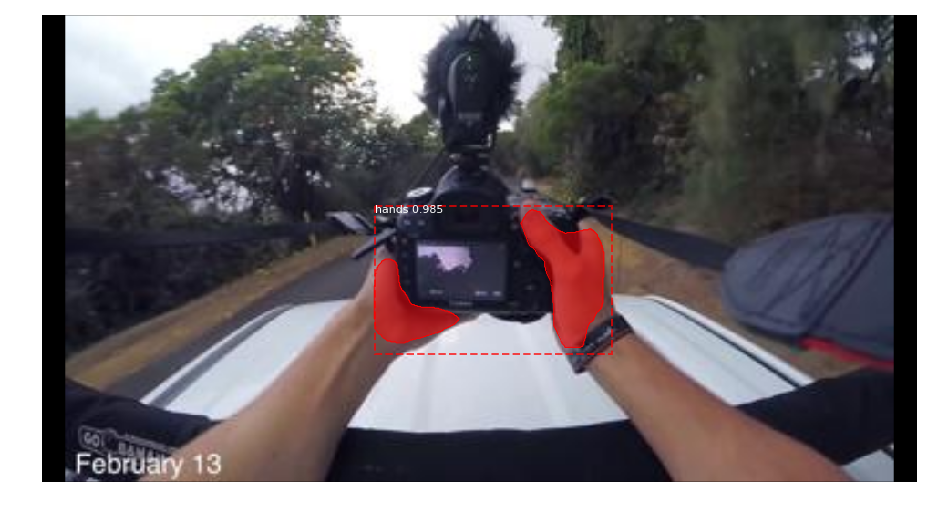

In [25]:
image_id = 32#random.choice(dataset.image_ids)
#image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
image = dataset.load_image(image_id)
image, window, scale, padding, crop = utils.resize_image(
        image,
        min_dim=config.IMAGE_MIN_DIM,
        min_scale=config.IMAGE_MIN_SCALE,
        max_dim=config.IMAGE_MAX_DIM,
        mode=config.IMAGE_RESIZE_MODE)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
#results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

results = results = model.detect([image], verbose=1)

# Display results
r = results[0]
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)
class_names = ['BG', 'hands']


# Compute AP over range 0.5 to 0.95 and print it
# utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
#                        r['rois'], r['class_ids'], r['scores'], r['masks'],
#                        verbose=1)

# visualize.display_differences(
#     image,
#     gt_bbox, gt_class_id, gt_mask,
#     r['rois'], r['class_ids'], r['scores'], r['masks'],
#     dataset.class_names, ax=get_ax(),
#     show_box=False, show_mask=False,
#     iou_threshold=0.5, score_threshold=0.5)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [14]:
class_names = ['BG', 'hands']

In [39]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]

filename = os.path.join(IMAGE_DIR, 'hands3.jpg')

#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread(filename)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

Processing 1 images
image                    shape: (423, 634, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 423, 634, 3)      min:    0.00000  max:  255.00000  uint8
image_metas              shape: (1, 14)               min:    0.00000  max:  960.00000  float64
anchors                  shape: (1, 67572, 4)         min:   -0.21448  max:    1.12206  float32


InvalidArgumentError: Incompatible shapes: [1,28,40,256] vs. [1,27,40,256]
	 [[Node: fpn_p4add_2/add = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](fpn_p5upsampled_2/ResizeNearestNeighbor, fpn_c4p4_2/BiasAdd)]]
	 [[Node: mrcnn_class_2/Reshape_1/_62 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_2167_mrcnn_class_2/Reshape_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'fpn_p4add_2/add', defined at:
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\asyncio\base_events.py", line 1434, in _run_once
    handle._run()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\IPython\core\interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\IPython\core\interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\IPython\core\interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\IPython\core\interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\IPython\core\interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-cbd73b52b7e8>", line 5, in <module>
    config=config)
  File "D:\7_jwpark\deep_learning\Mask_RCNN\mrcnn\model.py", line 1837, in __init__
    self.keras_model = self.build(mode=mode, config=config)
  File "D:\7_jwpark\deep_learning\Mask_RCNN\mrcnn\model.py", line 1907, in build
    KL.Conv2D(config.TOP_DOWN_PYRAMID_SIZE, (1, 1), name='fpn_c4p4')(C4)])
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\keras\engine\base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\keras\layers\merge.py", line 161, in call
    return self._merge_function(inputs)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\keras\layers\merge.py", line 227, in _merge_function
    output += inputs[i]
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\ops\math_ops.py", line 907, in binary_op_wrapper
    return func(x, y, name=name)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 192, in add
    "Add", x=x, y=y, name=name)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\users\jwpark\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [1,28,40,256] vs. [1,27,40,256]
	 [[Node: fpn_p4add_2/add = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](fpn_p5upsampled_2/ResizeNearestNeighbor, fpn_c4p4_2/BiasAdd)]]
	 [[Node: mrcnn_class_2/Reshape_1/_62 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_2167_mrcnn_class_2/Reshape_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
